Image successfully loaded.


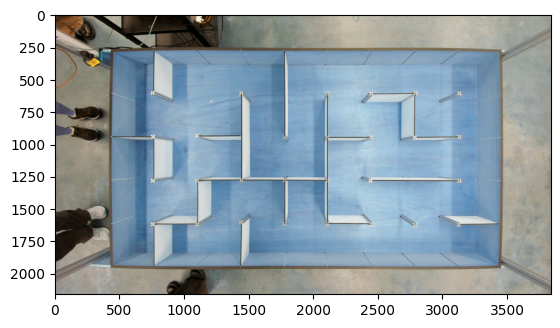

[[ 7.96812749e-01 -4.16333634e-16 -3.45019920e+02]
 [-8.32667268e-17  9.55223881e-01 -2.68417910e+02]
 [ 1.35525272e-19 -2.16840434e-19  1.00000000e+00]]


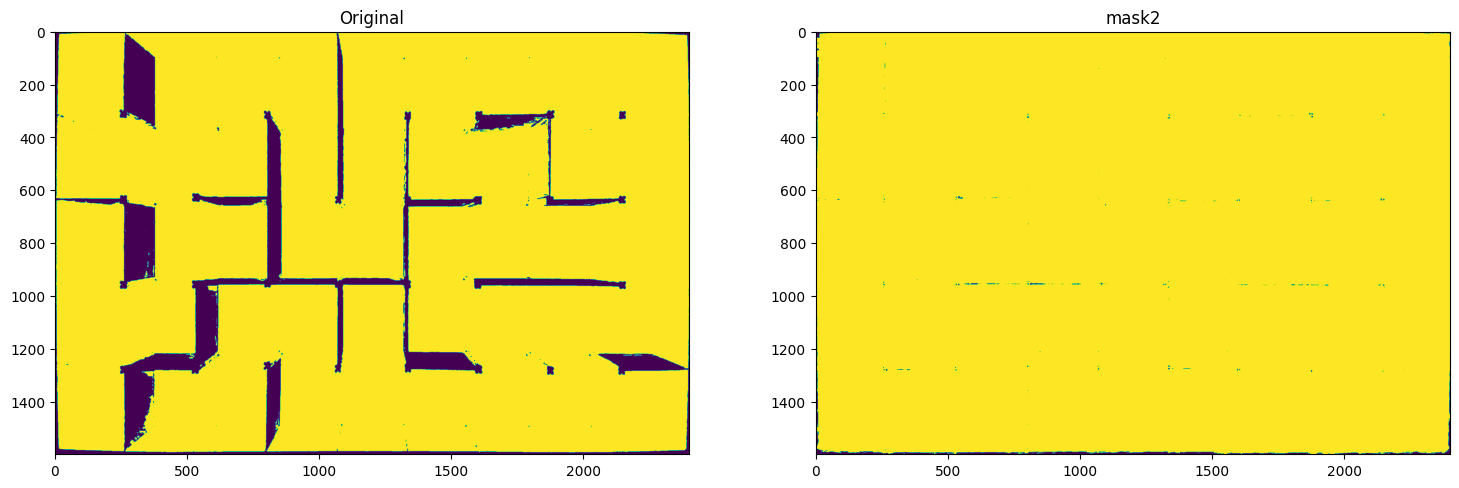

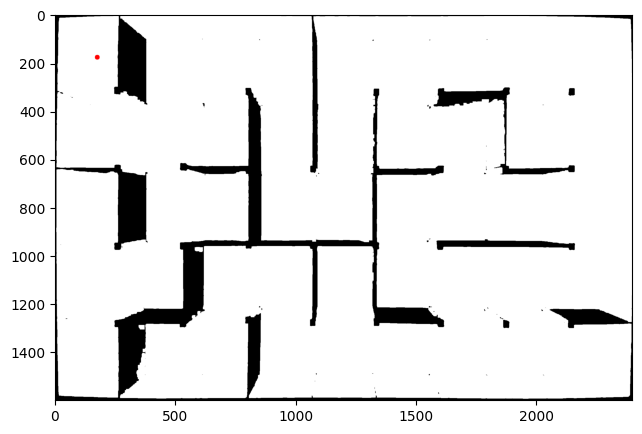

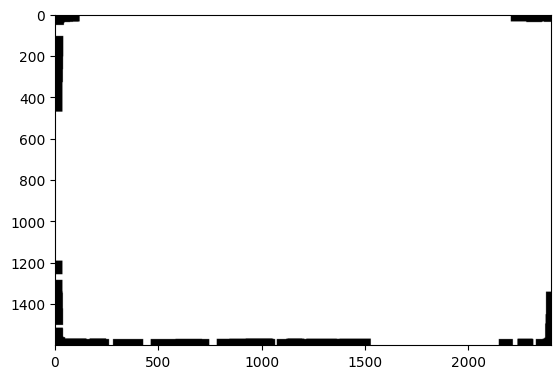

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import math

img = cv2.imread("demo_maze_solving.jpg")

if img is None:
    print(f"Error: The image could not be loaded.")
else:
    print(f"Image successfully loaded.")

    try:

        # Display resulting image
        plt.imshow(img)
        plt.show()
    
    except cv2.error as e:
        print(f"Error: {e}")
## Perspective transformation
# img = img[100:1000, 200:1750]
# dst = cv2.resize(img, (2400, 1600))

## Perspective tranformation
pts1 = np.float32([[433,281],[3445, 281],[433,1956],[3445,1956]]) # four points on the first image
pts2 = np.float32([[0,0],[2400,0],[0,1600],[2400,1600]]) # four points on the second image

H = cv2.getPerspectiveTransform(pts1,pts2) # homography matrix
print(H)

dst = cv2.warpPerspective(img, H, (2400,1600))

# Initialize HSV min/max values
hMin = 0
hMax = 25
sMin = 30
sMax = 255
vMin = 59
vMax = 255

obstacles = dst.copy()
hMin2 = 26
hMax2 = 157
sMin2 = 64
sMax2 = 255
vMin2 = 49
vMax2 = 236

lower = np.array([hMin, sMin, vMin])
upper = np.array([hMax, sMax, vMax])

lower2 = np.array([hMin2, sMin2, vMin2])
upper2 = np.array([hMax2, sMax2, vMax2])

hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)

hsv2 = cv2.cvtColor(obstacles, cv2.COLOR_BGR2HSV)
mask2 = cv2.inRange(hsv2, lower2, upper2)
mask2 = cv2.bitwise_not(mask2) 

kernel = np.ones((10,10), np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
gray = cv2.cvtColor(opening, cv2.COLOR_GRAY2BGR)

opening2 = cv2.dilate(mask2, kernel, iterations=1)
opening2 = cv2.erode(opening2, kernel, iterations=7)
gray2 = cv2.cvtColor(opening2, cv2.COLOR_GRAY2BGR)


fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(mask), ax1.set_title("Original")
ax2.imshow(mask2), ax2.set_title("mask2")
plt.show()

cv2.line(gray,(175,175),(175,175),(255,0,0),20)
plt.figure(figsize = (9,5))
plt.imshow(gray)
plt.show()
plt.imshow(gray2)
plt.show()

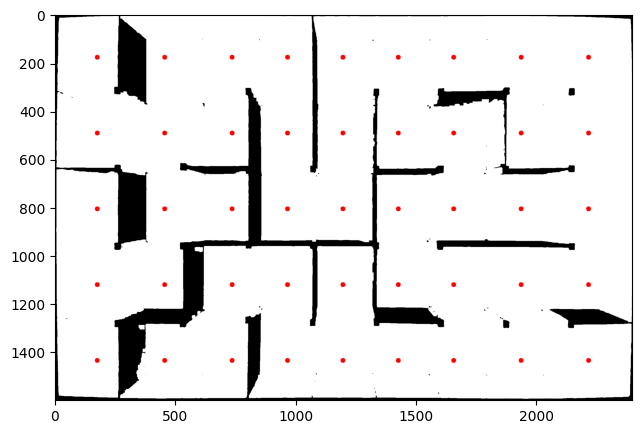

[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


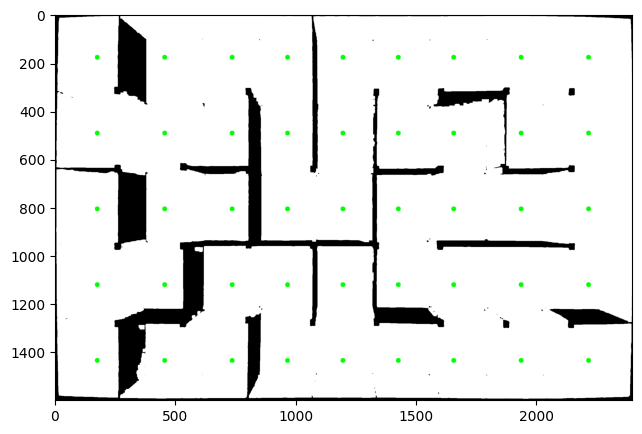

[[1. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 1.]]


In [2]:
maze1 = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
maze = gray

horizontalWall = np.zeros((6,9))
horizontalWall[0,:] = 1
horizontalWall[5,:] = 1

verticalWall = np.zeros((5,10))
verticalWall[:,0] = 1
verticalWall[:,9] = 1

# change following numbers!
startPos = [175,175]
oneCellHorizontal = 230
oneCellVertical = 315

currPos = startPos.copy()
for i in range(horizontalWall.shape[1]): # columns
    
    cv2.line(maze,(currPos[0],currPos[1]),(currPos[0],currPos[1]),(255,0,0),20)
    
    for j in range(horizontalWall.shape[0] - 2): # rows
        
        for k in range(oneCellVertical):
            currPos[1] = currPos[1] + 1
            if maze1[currPos[1],currPos[0]] == 0: # if encounter a black pixel
                horizontalWall[j+1,i] = 1
        
        cv2.line(maze,(currPos[0],currPos[1]),(currPos[0],currPos[1]),(255,0,0),20)

    currPos[1] = startPos[1]
    if (i < 2) or (i > 5):
        currPos[0] += oneCellHorizontal + 50
    else:
        currPos[0] += oneCellHorizontal 
    
plt.figure(figsize = (9,5))
plt.imshow(maze, cmap="gray")
plt.show()
print(horizontalWall)


currPos = startPos.copy()
for i in range(verticalWall.shape[0]): # rows
    
    cv2.line(maze,(currPos[0],currPos[1]),(currPos[0],currPos[1]),(0,255,0),20)
    
    for j in range(verticalWall.shape[1] - 2): # columns
        
        oneCellHorizontalTemp = oneCellHorizontal
        if (j < 2) or (j > 5):
            oneCellHorizontalTemp += 50
        else:
            oneCellHorizontalTemp += 0
        
        for k in range(oneCellHorizontalTemp):
            currPos[0] = currPos[0] + 1
            if maze1[currPos[1],currPos[0]] == 0: # if encounter a black pixel
                verticalWall[i,j+1] = 1
        
        cv2.line(maze,(currPos[0],currPos[1]),(currPos[0],currPos[1]),(0,255,0),20)

    currPos[0] = startPos[0]
    currPos[1] += oneCellVertical
    
plt.figure(figsize = (9,5))
plt.imshow(maze, cmap="gray")
plt.show()
print(verticalWall)

In [3]:
cell_positions = {
    '00': [175,175], '01': [455,175], '02': [735,175], '03': [965,175], '04': [1195,175], '05': [1425,175], '06': [1655,175], '07': [1935,175], '08': [2215,175],
    '10': [175,490], '11': [455,490], '12': [735,490], '13': [965,490], '14': [1195,490], '15': [1425,490], '16': [1655,490], '17': [1935,490], '18': [2215,490],
    '20': [175,805], '21': [455,805], '22': [735,805], '23': [965,805], '24': [1195,805], '25': [1425,805], '26': [1655,805], '27': [1935,805], '28': [2215,805],
    '30': [175,1120], '31': [455,1120], '32': [735,1120], '33': [965,1120], '34': [1195,1120], '35': [1425,1120], '36': [1655,1120], '37': [1935,1120], '38': [2215,1120],
    '40': [175,1435], '41': [455,1435], '42': [735,1435], '43': [965,1435], '44': [1195,1435], '45': [1425,1435], '46': [1655,1435], '47': [1935,1435], '48': [2215,1435],
}

llfrflffrflfrfrfflflffrfrflfrfrflflfrfrfffrflflfrf


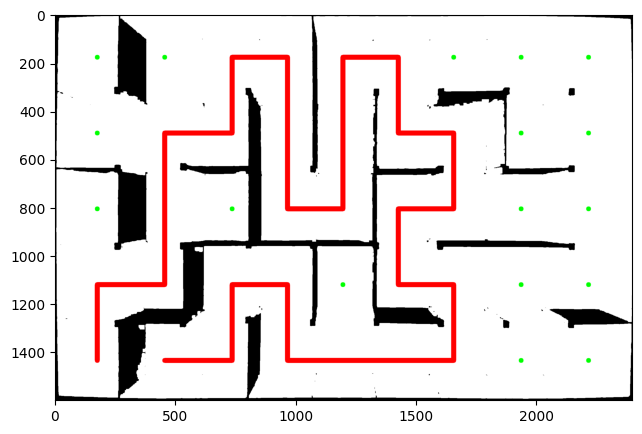

In [4]:
def path_generation(targetR, targetC, startingR, startingC, currentF):
    cells = np.array([45]*45).reshape(5,9)

    # Goal
    targetRow = targetR
    targetCol = targetC

    cells[targetRow, targetCol] = 0
    currentExploredValue = 0
    mazeValueChanged = 1
    while mazeValueChanged != 0:
        mazeValueChanged = 0
        i = 0
        while i < 5:
            j = 0
            while j < 9:
                if cells[i,j] == currentExploredValue:
                    if i!=0 and cells[i-1,j] == 45 and horizontalWall[i,j] == 0:
                        cells[i-1,j] = cells[i,j] + 1
                        mazeValueChanged = 1

                    if i!=4 and cells[i+1,j] == 45 and horizontalWall[i+1,j] == 0:
                        cells[i+1,j] = cells[i,j] + 1
                        mazeValueChanged = 1

                    if j!=0 and cells[i, j-1] == 45 and verticalWall[i,j] == 0:
                        cells[i,j-1] = cells[i,j] + 1
                        mazeValueChanged = 1

                    if j!=8 and cells[i, j+1] == 45 and verticalWall[i,j+1] == 0:
                        cells[i,j+1] = cells[i,j] + 1
                        mazeValueChanged = 1

                j += 1
            i += 1
        currentExploredValue += 1
#     print(cells)

    # starting information
    startingRow = startingR
    startingCol = startingC
    currentFacing = currentF

    row = startingRow
    col = startingCol
    directions = []
    success = 0
    while not success:
        if cells[row, col] == 0:
            success = 1
        if row!=0 and cells[row-1,col] == cells[row, col] - 1 and horizontalWall[row,col] == 0:
            directions.append('north')
            row -= 1
        if row!=4 and cells[row+1,col] == cells[row, col] - 1 and horizontalWall[row+1,col] == 0:
            directions.append('south')
            row += 1
        if col!=0 and cells[row,col-1] == cells[row, col] - 1 and verticalWall[row,col] == 0:
            directions.append('west')
            col -= 1
        if col!=8 and cells[row,col+1] == cells[row, col] - 1 and verticalWall[row,col+1] == 0:
            directions.append('east')
            col += 1

#     print(directions)
    cardinalDirections = ['north', 'east', 'south', 'west']
    relativeDirections = ''

    for nextDirection in directions:
            if nextDirection == currentFacing:
                relativeDirections = relativeDirections + 'f'
            else:
                # Determine the index of current and next direction
                current_index = cardinalDirections.index(currentFacing)
                next_index = cardinalDirections.index(nextDirection)

                # Calculate the relative direction
                if (current_index + 1) % 4 == next_index:
                    relativeDirections = relativeDirections + 'r'
                    relativeDirections = relativeDirections + 'f'
                elif (current_index - 1) % 4 == next_index:
                    relativeDirections = relativeDirections + 'l'
                    relativeDirections = relativeDirections + 'f'
                else:
                    if (current_index - 2) % 4 == next_index:
                        relativeDirections = relativeDirections + 'l'
                        relativeDirections = relativeDirections + 'l'
                        relativeDirections = relativeDirections + 'f'
                currentFacing = nextDirection
    print(relativeDirections)
    return relativeDirections

startPosition = [4,0]
goalPosition = [4,1]
startHeading = 'south'

ppp = path_generation(goalPosition[0],goalPosition[1],startPosition[0],startPosition[1],startHeading)

###### show path on the map
curr_pos = cell_positions[str(startPosition[0])+str(startPosition[1])]
curr_pos_cell = startPosition
curr_heading = startHeading
for i in ppp:
    if i == 'f':
        if curr_heading == 'north':
            next_pos = cell_positions[str(curr_pos_cell[0]-1)+str(curr_pos_cell[1])]
            cv2.line(maze,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0]-1,curr_pos_cell[1]]
        elif curr_heading == 'east':
            next_pos = cell_positions[str(curr_pos_cell[0])+str(curr_pos_cell[1]+1)]
            cv2.line(maze,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0],curr_pos_cell[1]+1]
        elif curr_heading == 'south':
            next_pos = cell_positions[str(curr_pos_cell[0]+1)+str(curr_pos_cell[1])]
            cv2.line(maze,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0]+1,curr_pos_cell[1]]
        elif curr_heading == 'west':
            next_pos = cell_positions[str(curr_pos_cell[0])+str(curr_pos_cell[1]-1)]
            cv2.line(maze,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0],curr_pos_cell[1]-1]
    elif i == 'l':
        if curr_heading == 'north':
            curr_heading = 'west'
        elif curr_heading == 'east':
            curr_heading = 'north'
        elif curr_heading == 'south':
            curr_heading = 'east'
        elif curr_heading == 'west':
            curr_heading = 'south'
    elif i == 'r':
        if curr_heading == 'north':
            curr_heading = 'east'
        elif curr_heading == 'east':
            curr_heading = 'south'
        elif curr_heading == 'south':
            curr_heading = 'west'
        elif curr_heading == 'west':
            curr_heading = 'north'
            
plt.figure(figsize = (9,5))
plt.imshow(maze, cmap="gray")
plt.show()

In [5]:
cell_positions = {
    '00': [175,175], '01': [455,175], '02': [735,175], '03': [965,175], '04': [1195,175], '05': [1425,175], '06': [1655,175], '07': [1935,175], '08': [2215,175],
    '10': [175,490], '11': [455,490], '12': [735,490], '13': [965,490], '14': [1195,490], '15': [1425,490], '16': [1655,490], '17': [1935,490], '18': [2215,490],
    '20': [175,805], '21': [455,805], '22': [735,805], '23': [965,805], '24': [1195,805], '25': [1425,805], '26': [1655,805], '27': [1935,805], '28': [2215,805],
    '30': [175,1120], '31': [455,1120], '32': [735,1120], '33': [965,1120], '34': [1195,1120], '35': [1425,1120], '36': [1655,1120], '37': [1935,1120], '38': [2215,1120],
    '40': [175,1435], '41': [455,1435], '42': [735,1435], '43': [965,1435], '44': [1195,1435], '45': [1425,1435], '46': [1655,1435], '47': [1935,1435], '48': [2215,1435],
}

In [6]:
class Node:
    def __init__(self, node_id, x, y):
        self.id = node_id
        self.x = x
        self.y = y
    
    def get_point(self):
        return (self.x,self.y)
    
    def get_ID(self):
        return self.id

class Graph:
    def __init__(self):
        self.nodes = {}
        self.edges = {}

    def add_node(self, node_id, x, y):
        new_node = Node(node_id, x, y)
        self.nodes[node_id] = new_node

    def add_edge(self, node_id1, node_id2, weight):
        new_edge = {1: node_id1, 2: node_id2, 'weight': weight}
        self.edges.update({len(self.edges)+1: new_edge})

    def remove_edge(self, node_id1, node_id2):
        for x in self.edges.copy():
            if self.edges[x][1] == node_id1 and self.edges[x][2] == node_id2:
                self.edges.pop(x)
                
    def remove_node(self, node_id):
        for x in self.nodes.copy():
            if x == node_id:
                self.nodes.pop(x)
    
    def get_nodes(self):
        return self.nodes
    
    def get_edge_weight(self, node_id1, node_id2):
        for x in self.edges:
            if self.edges[x][1] == node_id1 and self.edges[x][2] == node_id2:
                return self.edges[x]['weight']
            elif self.edges[x][2] == node_id1 and self.edges[x][1] == node_id2:
                return self.edges[x]['weight']
            
    def edge_check(self, node_id1, node_id2):
        for x in self.edges:
            if self.edges[x][1] == node_id1 and self.edges[x][2] == node_id2:
                return True
            elif self.edges[x][2] == node_id1 and self.edges[x][1] == node_id2:
                return True
        return False
    
    def edges_from_node(self, node_id):
        edges = []
        for x in self.nodes:
            if self.edge_check(node_id, x):
                edges.append(x)
        return edges

In [7]:
def sort_weight(dist):
    return dist['weight']

def dijkstra(graph, start_id, end_id):
    path = []
    path_positions = []
    total_cost = 0
    q = []
    v = []
    parent = [None] * 500
    cost = [None] * 500
    
    q.append({'node_id': start_id, 'weight': 0})
    cost[start_id] = 0
    v.append(start_id)
    
    while q != []:
        curr_node = q.pop(0)
        
        if curr_node['node_id'] == end_id:
            break
            
        for i in graph.edges_from_node(curr_node['node_id']):
            if i not in v:
                parent[i] = curr_node['node_id']
                w = graph.get_edge_weight(i,curr_node['node_id']) + cost[curr_node['node_id']]
                cost[i] = w
                v.append(i)
                q.append({'node_id': i, 'weight': w})
            else:
                if graph.get_edge_weight(i,curr_node['node_id']) + cost[curr_node['node_id']] < cost[i]:
                    parent[i] = curr_node['node_id']
                    w = graph.get_edge_weight(i,curr_node['node_id']) + cost[curr_node['node_id']]
                    cost[i] = w
                    for qq in q:
                        if qq['node_id'] == i:
                            qq['weight'] = w
                
        q.sort(key = sort_weight)
        
    nodes = graph.get_nodes()

    curr_node = end_id
    path.insert(0,end_id)
    path_positions.insert(0,[nodes[end_id].get_point()[0],nodes[end_id].get_point()[1]])
    total_cost = cost[end_id]
    while curr_node != start_id:
        path.insert(0,parent[curr_node])
        path_positions.insert(0,[nodes[curr_node].get_point()[0],nodes[curr_node].get_point()[1]])
        curr_node = parent[curr_node]

    return (path, total_cost, path_positions)

def check_free_space(image, x, y):
    if (image[y,x] == [0,0,0]).all():
        return False
    return True

def find_distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def find_closest_node_rrt(graph, target_x, target_y):
    closest_node = {'node': None, 'distance': math.inf}
    
    nodes = graph.get_nodes()
    for n in nodes.values():
        x = n.get_point()[0]
        y = n.get_point()[1]
        distance = find_distance(x, y , target_x, target_y)
        if distance < closest_node['distance']:
            closest_node = {'node': n, 'distance': distance}

    return closest_node

def calculate_new_tree_point(x_closest, y_closest, x, y, step):
    dx = x - x_closest
    dy = y - y_closest
    distance = math.sqrt(dx**2 + dy**2)
    
    if distance < step:
        return x, y
    else:
        new_x = x_closest + (step/distance) * dx
        new_y = y_closest + (step/distance) * dy
        return int(new_x), int(new_y)
    
def check_clear_path(image, x1, y1, x2, y2):
    dist = int(find_distance(x1, y1, x2, y2))
    
    if dist == 0:
        return False
    
    x_iter = abs(x2 - x1)/dist
    y_iter = abs(y2 - y1)/dist
    
    if x1 < x2: 
        if y1 < y2:
            for i in range(dist):
                if (image[y1+int(i*y_iter),x1+int(i*x_iter)] == [0,0,0]).all():
                    return False
        else:
            for i in range(dist):
                if (image[y1-int(i*y_iter),x1+int(i*x_iter)] == [0,0,0]).all():
                    return False
    else: 
        if y1 < y2:
            for i in range(dist):
                if (image[y1+int(i*y_iter),x1-int(i*x_iter)] == [0,0,0]).all():
                    return False
        else:
            for i in range(dist):
                if (image[y1-int(i*y_iter),x1-int(i*x_iter)] == [0,0,0]).all():
                    return False

    return True

def nearest_neighbour(graph, start_id, target_x, target_y, image):
    neighbour = {'node': None, 'cost': math.inf}
    
    nodes = graph.get_nodes()
    for n in nodes.values():
        if n.get_ID() == -2:
            continue
        path, cost, pos = dijkstra(graph, n.get_ID(), start_id)
        total_cost = cost + find_distance(n.get_point()[0], n.get_point()[1], target_x, target_y)
        if total_cost < neighbour['cost'] and check_clear_path(image, n.get_point()[0], n.get_point()[1], target_x, target_y):
            neighbour = {'node': n, 'cost': total_cost}
    
    if neighbour['node'] is None:
        return False
    else:
        return neighbour

def rewire(graph, dist, x, y, image, node_id):
    nodes = graph.get_nodes()
    for n in nodes.values():
        if find_distance(n.get_point()[0], n.get_point()[1], x, y) <= dist:
            path, cost, p = dijkstra(graph, n.get_ID(), -1)
            path_new, cost_new, pp = dijkstra(graph, node_id, -1)
            
            if cost_new + find_distance(x,y,n.get_point()[0],n.get_point()[1]) < cost:
                if check_clear_path(image,x,y,n.get_point()[0],n.get_point()[1]):
#                     cv2.line(image,(nodes[path[1]].get_point()[0],nodes[path[1]].get_point()[1]),(n.get_point()[0],n.get_point()[1]),(255,255,255),1)
                    
                    d = find_distance(n.get_point()[0], n.get_point()[1], x, y)
                    graph.add_edge(n.get_ID(),node_id,d)
#                     cv2.line(image,(x,y),(n.get_point()[0],n.get_point()[1]),(0,125,0),1)

In [8]:
def rrt(goalX, goalY, beta, dimX, dimY, image, graph, goal_radius):
    step = 150
    dist = 150
    i = 0
    goal_check = False
    while not goal_check:

        if random.uniform(0, 1) < beta:
            x = goalX
            y = goalY
        else:
            x = random.randint(dimX[0], dimX[1])
            y = random.randint(dimY[0], dimY[1])
        
        if check_free_space(image, x, y):
            q_closest = find_closest_node_rrt(graph, x, y)
            x_closest = q_closest['node'].get_point()[0]
            y_closest = q_closest['node'].get_point()[1]
            
            q_new = calculate_new_tree_point(x_closest, y_closest, x, y, step)
            x_new = q_new[0]
            y_new = q_new[1]
            
            q_best = nearest_neighbour(graph, -1, x_new, y_new, image)
            if not q_best:
                continue
            else:
                x_best = q_best['node'].get_point()[0]
                y_best = q_best['node'].get_point()[1]
            
            if check_clear_path(image, x_best, y_best, x_new, y_new):
                cv2.circle(image, (x_new,y_new), 15, (0,0,255), -1)
#                 cv2.line(image,(x_best,y_best),(x_new,y_new),(0,0,125),5)
                dd = find_distance(x_new,y_new,x_best,y_best)

                graph.add_node(i,x_new,y_new)
                graph.add_edge(q_best['node'].get_ID(),i,dd)
                
                rewire(graph, dist, x_new, y_new, image, i)

                i += 1

                if find_distance(x_new, y_new, goalX, goalY) < goal_radius:
                    goal_check = True
    return i

Before obstacles: 
flflfrffrfflflff
1195 175
1195 175
1195 175
1310 175
1310 175
1935 175
Heading: 
0, 0, 0, 
Distance: 
0.0, 105.92105263157895, 575.6578947368421, 
After obstacles: 
f


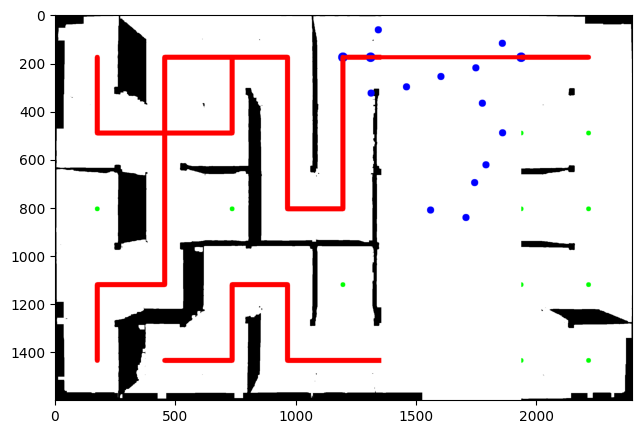

In [9]:
obstacleCols = [5,6,7]
startPos = [0,0]
goalPos = [0,8]
startHeading = 'south'
continuousPlanning_map = maze

###### find opening into the obstacle section
for row_opening in range(5):
    if verticalWall[row_opening,obstacleCols[0]] == 0:
        break;

print('Before obstacles: ')
before_path = path_generation(row_opening,obstacleCols[0]-1,startPos[0],startPos[1],startHeading)

###### find exit from obstacle section
for row_exit in range(5):
    if verticalWall[row_exit,obstacleCols[2]+1] == 0:
        break;
        
        
###### RRT* for obstacle section
g = Graph()
random.seed(42)
beta = 0.2
goal_radius = 20

# generate the start node with a node_ID of -2
start_rrt_pos = cell_positions[str(row_opening)+str(obstacleCols[0]-1)]
goal_rrt_pos = cell_positions[str(row_exit)+str(obstacleCols[2])]

cv2.rectangle(continuousPlanning_map,(start_rrt_pos[0]+160,0),(goal_rrt_pos[0],continuousPlanning_map.shape[1]),(255,255,255), -1)
mask = (gray2 != gray).astype(np.uint8)
continuousPlanning_map[mask == 1] = [0]

g.add_node(-2,start_rrt_pos[0],start_rrt_pos[1]) # start node
cv2.circle(continuousPlanning_map, (start_rrt_pos[0],start_rrt_pos[1]), 20, (0,0,255), -1)
cv2.circle(continuousPlanning_map, (goal_rrt_pos[0],goal_rrt_pos[1]), 20, (0,0,255), -1)

g.add_node(-1,start_rrt_pos[0]+115,start_rrt_pos[1]) # start node
cv2.circle(continuousPlanning_map, (start_rrt_pos[0]+115,start_rrt_pos[1]), 20, (0,0,255), -1)
cv2.line(continuousPlanning_map,(start_rrt_pos[0],start_rrt_pos[1]),(start_rrt_pos[0]+115,start_rrt_pos[1]),(0,0,125),5)

i = rrt(goal_rrt_pos[0], goal_rrt_pos[1], beta, [start_rrt_pos[0]+115,goal_rrt_pos[0]], [0,1599], continuousPlanning_map, g, goal_radius)

path, cost, positions = dijkstra(g, -1, i-1)
path.insert(0,-2)
# print(f"Path: {path}, Positions: {positions}")

heading_dist = []

nodes = g.get_nodes()
curr_node = path[0]
last_node = path[0]
for p in path:
    curr_node = p
    cv2.line(continuousPlanning_map,nodes[last_node].get_point(),nodes[curr_node].get_point(),(255,0,0),15)
    x1 = nodes[last_node].get_point()[0]
    y1 = nodes[last_node].get_point()[1]
    x2 = nodes[curr_node].get_point()[0]
    y2 = nodes[curr_node].get_point()[1]
    print(x1,y1)
    print(x2,y2)
    if y2-y1 != 0:
        h = math.atan(abs(x2-x1)/abs(y2-y1))
    else:
        h = 0
    d = find_distance(x1,y1,x2,y2) * 350/380
    heading_dist.append([h,d])
    last_node = curr_node

print("Heading: ")
for i in heading_dist:
    print(i[0], end=", ")
    
print("\nDistance: ")
for i in heading_dist:
    print(i[1], end=", ")


print('\nAfter obstacles: ')
after_path = path_generation(goalPos[0],goalPos[1],row_exit,obstacleCols[2],'east')


###### show path on the map
curr_pos = cell_positions[str(startPos[0])+str(startPos[1])]
curr_pos_cell = startPos
curr_heading = startHeading
for i in before_path:
    if i == 'f':
        if curr_heading == 'north':
            next_pos = cell_positions[str(curr_pos_cell[0]-1)+str(curr_pos_cell[1])]
            cv2.line(continuousPlanning_map,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0]-1,curr_pos_cell[1]]
        elif curr_heading == 'east':
            next_pos = cell_positions[str(curr_pos_cell[0])+str(curr_pos_cell[1]+1)]
            cv2.line(continuousPlanning_map,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0],curr_pos_cell[1]+1]
        elif curr_heading == 'south':
            next_pos = cell_positions[str(curr_pos_cell[0]+1)+str(curr_pos_cell[1])]
            cv2.line(continuousPlanning_map,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0]+1,curr_pos_cell[1]]
        elif curr_heading == 'west':
            next_pos = cell_positions[str(curr_pos_cell[0])+str(curr_pos_cell[1]-1)]
            cv2.line(continuousPlanning_map,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0],curr_pos_cell[1]-1]
    elif i == 'l':
        if curr_heading == 'north':
            curr_heading = 'west'
        elif curr_heading == 'east':
            curr_heading = 'north'
        elif curr_heading == 'south':
            curr_heading = 'east'
        elif curr_heading == 'west':
            curr_heading = 'south'
    elif i == 'r':
        if curr_heading == 'north':
            curr_heading = 'east'
        elif curr_heading == 'east':
            curr_heading = 'south'
        elif curr_heading == 'south':
            curr_heading = 'west'
        elif curr_heading == 'west':
            curr_heading = 'north'
            
curr_pos = cell_positions[str(row_exit)+str(obstacleCols[2])]
curr_pos_cell = [row_exit,obstacleCols[2]]
curr_heading = 'east'
iter = 0
for i in after_path:
    if i == 'f':
        if curr_heading == 'north':
            next_pos = cell_positions[str(curr_pos_cell[0]-1)+str(curr_pos_cell[1])]
            cv2.line(continuousPlanning_map,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0]-1,curr_pos_cell[1]]
        elif curr_heading == 'east':
            next_pos = cell_positions[str(curr_pos_cell[0])+str(curr_pos_cell[1]+1)]
            cv2.line(continuousPlanning_map,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0],curr_pos_cell[1]+1]
        elif curr_heading == 'south':
            next_pos = cell_positions[str(curr_pos_cell[0]+1)+str(curr_pos_cell[1])]
            cv2.line(continuousPlanning_map,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0]+1,curr_pos_cell[1]]
        elif curr_heading == 'west':
            next_pos = cell_positions[str(curr_pos_cell[0])+str(curr_pos_cell[1]-1)]
            cv2.line(continuousPlanning_map,(curr_pos[0],curr_pos[1]),(next_pos[0],next_pos[1]),(255,0,0),20)
            curr_pos = next_pos
            curr_pos_cell = [curr_pos_cell[0],curr_pos_cell[1]-1]
    elif i == 'l':
        if curr_heading == 'north':
            curr_heading = 'west'
        elif curr_heading == 'east':
            curr_heading = 'north'
        elif curr_heading == 'south':
            curr_heading = 'east'
        elif curr_heading == 'west':
            curr_heading = 'south'
    elif i == 'r':
        if curr_heading == 'north':
            curr_heading = 'east'
        elif curr_heading == 'east':
            curr_heading = 'south'
        elif curr_heading == 'south':
            curr_heading = 'west'
        elif curr_heading == 'west':
            curr_heading = 'north'

plt.figure(figsize = (9,5))
plt.imshow(continuousPlanning_map, cmap="gray")
plt.show()

## 